<a href="https://colab.research.google.com/github/Avina20/ProductivityDashboard/blob/main/viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''import dash
from dash import dcc, html
from dash.dependencies import Input, Output'''

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('MTA_Monthly_2008.csv')
df.head()

,Month,Agency,Ridership
0,2008-01-01,MNR,6453734.0
1,2008-02-01,MNR,6144377.0
2,2008-03-01,MNR,6602280.0
3,2008-04-01,B&T,24900328.0
4,2008-04-01,MNR,6787480.0


In [13]:
df.describe()

,Ridership
count,8.770000e+02
mean,2.094358e+07
std,2.974243e+07
min,0.000000e+00
25%,4.474399e+06
50%,7.244976e+06
75%,2.631030e+07
max,1.553157e+08


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      877 non-null    object 
 1   Agency     877 non-null    object 
 2   Ridership  877 non-null    float64
dtypes: float64(1), object(2)
memory usage: 20.7+ KB


In [6]:
df['Agency'].unique()

array(['MNR', 'B&T', 'Bus', 'Subway', 'AAR', 'BT', 'LIRR', 'MTA Bus',
       'NYCT Bus', 'SIR'], dtype=object)

In [17]:
df[df['Agency']=="Subway"].count()

,0
Month,86
Agency,86
Ridership,86


<Axes: xlabel='Agency', ylabel='Ridership'>

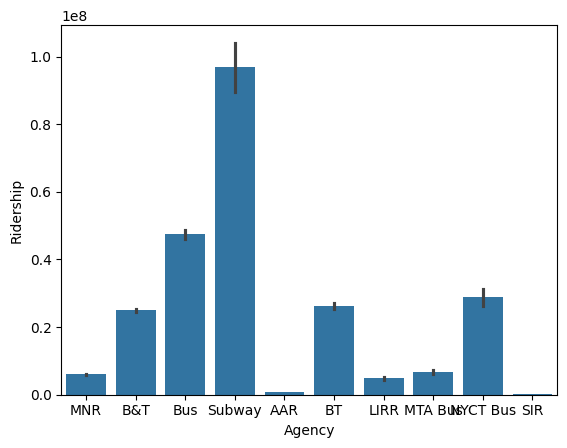

In [19]:
sns.barplot(x="Agency", y="Ridership", data=df)

In [35]:
df['Month']= pd.to_datetime(df['Month'])

In [36]:
df['Year']= df['Month'].dt.year

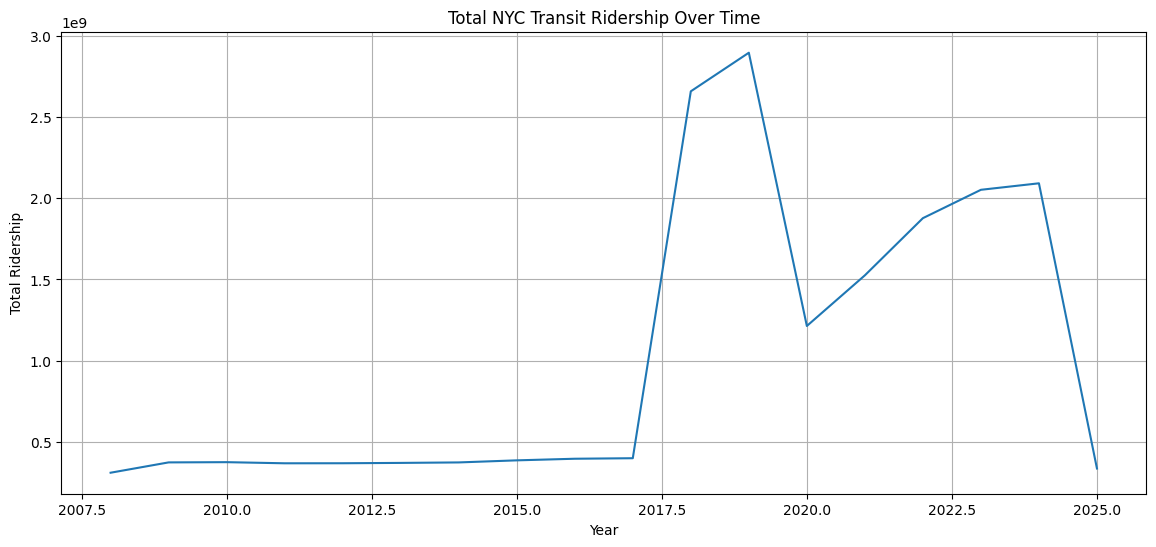

In [25]:
df_grouped = df.groupby('Year')['Ridership'].sum()

plt.figure(figsize=(14, 6))
df_grouped.plot()
plt.title('Total NYC Transit Ridership Over Time')
plt.xlabel('Year')
plt.ylabel('Total Ridership')
plt.grid(True)
plt.show()

In [26]:
df['Month']=df['Month'].dt.month

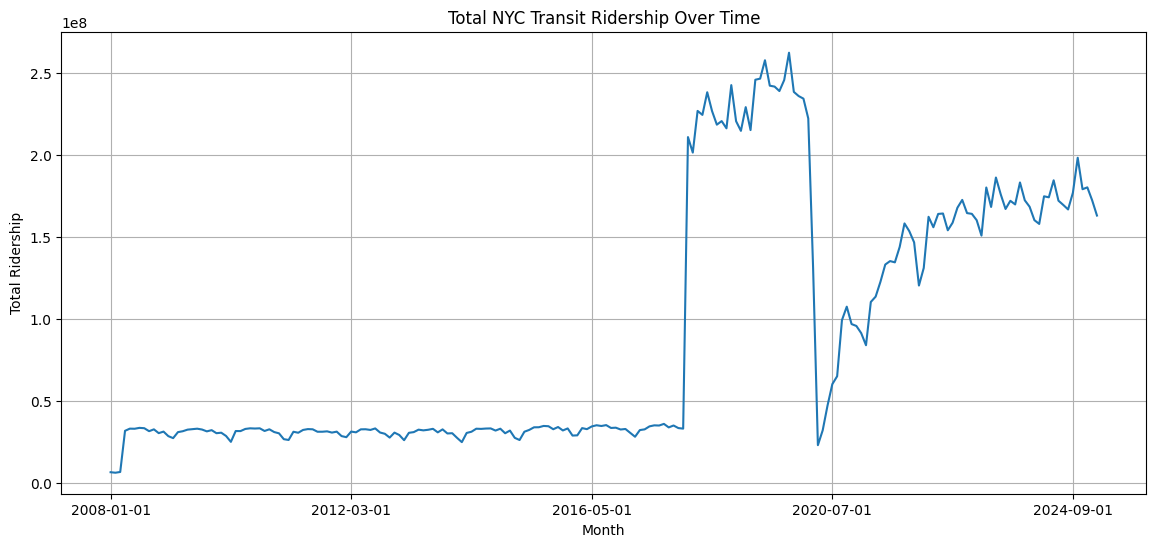

In [29]:
df_grouped = df.groupby('Month')['Ridership'].sum()

plt.figure(figsize=(14, 6))
df_grouped.plot()
plt.title('Total NYC Transit Ridership Over Time')
plt.xlabel('Date')
plt.ylabel('Total Ridership')
plt.grid(True)
plt.show()

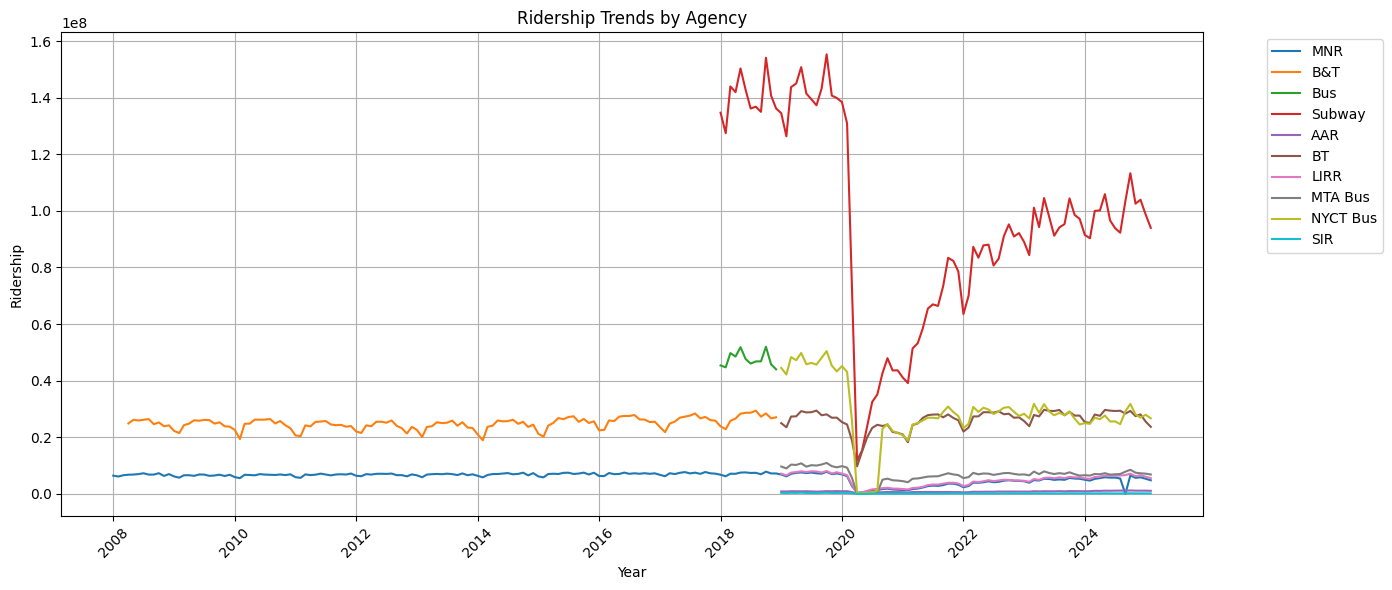

In [40]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Month', y='Ridership', hue='Agency')
plt.title('Ridership Trends by Agency')
plt.xlabel('Year')
plt.ylabel('Ridership')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [49]:
#load excel in dataframe
prodDf = pd.read_excel('total-factor-productivity.xlsx', header=2)

In [50]:
prodDf

,NAICS,Sector,Basis,Measure,Units,1987,1988,1989,1990,1991,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,XG,Private nonfarm business sector,All workers,Total factor productivity,Index (2017=100),78.506,79.339,79.490,79.501,79.197,...,99.400,99.340,100.000,100.644,101.934,101.381,105.225,104.047,105.452,106.847
1,XG,Private nonfarm business sector,All workers,Real value-added output,Index (2017=100),41.808,43.719,45.312,45.984,45.739,...,95.122,97.093,100.000,103.430,106.754,103.875,111.800,114.571,118.132,121.559
2,XG,Private nonfarm business sector,All workers,Combined inputs,Index (2017=100),53.255,55.104,57.003,57.840,57.753,...,95.696,97.738,100.000,102.768,104.728,102.459,106.248,110.114,112.025,113.786
3,XG,Private nonfarm business sector,All workers,Capital input,Index (2017=100),35.227,36.613,38.058,39.439,40.594,...,94.319,97.152,100.000,103.018,106.155,109.161,111.627,114.713,117.858,121.232
4,XG,Private nonfarm business sector,All workers,Labor input,Index (2017=100),65.939,68.086,70.272,70.570,69.444,...,96.565,98.105,100.000,102.611,103.837,98.418,103.005,107.375,108.487,109.209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,PG,Private business sector,All workers,Capital costs,Billions of current dollars,1154.25,1205.589,1366.691,1411.580,1409.473,...,5038.958,5167.709,5421.550,5757.712,6002.429,5933.357,6970.279,7775.909,8437.364,N.A.
118,PG,Private business sector,All workers,Hourly compensation,Current dollars per hour worked,14.259,15.107,15.426,16.367,17.202,...,38.341,39.002,40.120,41.301,42.846,45.088,47.004,49.676,52.025,N.A.
119,PG,Private business sector,All workers,Employment,Millions of jobs,90.513,93.299,95.328,95.949,94.438,...,118.473,120.817,122.870,125.070,126.662,118.365,123.466,129.143,131.198,N.A.
120,PG,Private business sector,All workers,Capital share,Percentage,0.331,0.322,0.340,0.335,0.328,...,0.389,0.388,0.389,0.391,0.391,0.395,0.411,0.414,0.420,N.A.


In [61]:
tfp = prodDf.iloc[0]

In [62]:
year_columns = [col for col in tfp.index if isinstance(col, (int, float, str)) and str(col).isdigit()]
tfp_values = tfp[year_columns]

# 3. Create a new DataFrame from this row
tfp_df = pd.DataFrame({
    'Year': [int(year) for year in tfp_values.index],
    'Total Factor Productivity': tfp_values.values
})

tfp_df

,Year,Total Factor Productivity
0,1987,78.506
1,1988,79.339
2,1989,79.49
3,1990,79.501
4,1991,79.197
5,1992,81.386
6,1993,81.065
7,1994,81.402
8,1995,81.541
9,1996,82.307


<Axes: xlabel='Year', ylabel='Total Factor Productivity'>

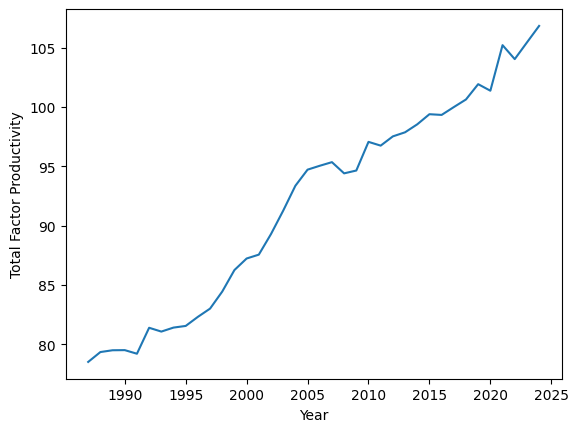

In [64]:
sns.lineplot(x="Year", y = "Total Factor Productivity", data=tfp_df)

In [65]:
import plotly.express as px

fig = px.line(
    tfp_df,
    x='Year',
    y='Total Factor Productivity',
    title='Total Factor Productivity (1987–2024)',
    markers=True,
    template='plotly_white'
)
fig.show()


In [93]:
nonfarmdf = prodDf[prodDf['Sector']=="Private nonfarm business sector"]
farmincDf = prodDf[prodDf['Sector']!="Private nonfarm business sector"]

In [68]:
nonfarmdf.columns

Index(['NAICS', 'Sector', 'Basis', 'Measure', 'Units', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype='object')

In [71]:
farmincDf.drop(columns=['NAICS','Sector','Basis'])

,Measure,Units,1987,1988,1989,1990,1991,1992,1993,1994,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
61,Total factor productivity,Index (2017=100),77.405,78.068,78.414,78.640,78.334,80.665,80.311,80.665,...,99.365,99.364,100.000,100.712,101.919,101.282,105.215,104.048,105.509,106.905
62,Real value-added output,Index (2017=100),41.843,43.642,45.305,46.021,45.781,47.713,49.103,51.470,...,95.139,97.153,100.000,103.434,106.650,103.794,111.724,114.457,118.026,121.501
63,Combined inputs,Index (2017=100),54.057,55.902,57.776,58.521,58.444,59.149,61.141,63.807,...,95.747,97.775,100.000,102.702,104.641,102.480,106.186,110.004,111.863,113.667
64,Capital input,Index (2017=100),36.378,37.827,39.276,40.605,41.715,42.805,44.151,45.801,...,94.467,97.190,100.000,102.978,106.038,108.977,111.479,114.637,117.672,121.12
65,Labor input,Index (2017=100),66.639,68.731,70.872,71.042,69.961,70.343,72.788,76.193,...,96.568,98.147,100.000,102.526,103.755,98.495,102.942,107.200,108.280,109.009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Capital costs,Billions of current dollars,1154.25,1205.589,1366.691,1411.580,1409.473,1435.582,1590.103,1740.294,...,5038.958,5167.709,5421.550,5757.712,6002.429,5933.357,6970.279,7775.909,8437.364,N.A.
118,Hourly compensation,Current dollars per hour worked,14.259,15.107,15.426,16.367,17.202,18.623,18.670,18.780,...,38.341,39.002,40.120,41.301,42.846,45.088,47.004,49.676,52.025,N.A.
119,Employment,Millions of jobs,90.513,93.299,95.328,95.949,94.438,93.969,95.999,99.258,...,118.473,120.817,122.870,125.070,126.662,118.365,123.466,129.143,131.198,N.A.
120,Capital share,Percentage,0.331,0.322,0.340,0.335,0.328,0.316,0.332,0.341,...,0.389,0.388,0.389,0.391,0.391,0.395,0.411,0.414,0.420,N.A.


In [72]:
nonfarmdf['Measure'].head(25)

,Measure
0,Total factor productivity
1,Real value-added output
2,Combined inputs
3,Capital input
4,Labor input
5,Hours worked
6,Labor composition
7,Labor productivity
8,Capital productivity
9,Capital intensity


In [94]:
nonfarmdf=nonfarmdf[nonfarmdf.index>23]

In [79]:
nonfarmdf

,Measure,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Total factor productivity,78.506,79.339,79.490,79.501,79.197,81.386,81.065,81.402,81.541,...,99.400,99.340,100.0,100.644,101.934,101.381,105.225,104.047,105.452,106.847
1,Real value-added output,41.808,43.719,45.312,45.984,45.739,47.587,49.087,51.344,53.147,...,95.122,97.093,100.0,103.430,106.754,103.875,111.800,114.571,118.132,121.559
2,Combined inputs,53.255,55.104,57.003,57.840,57.753,58.471,60.552,63.075,65.178,...,95.696,97.738,100.0,102.768,104.728,102.459,106.248,110.114,112.025,113.786
3,Capital input,35.227,36.613,38.058,39.439,40.594,41.736,43.114,44.779,46.831,...,94.319,97.152,100.0,103.018,106.155,109.161,111.627,114.713,117.858,121.232
4,Labor input,65.939,68.086,70.272,70.570,69.444,69.812,72.380,75.504,77.545,...,96.565,98.105,100.0,102.611,103.837,98.418,103.005,107.375,108.487,109.209
5,Hours worked,75.923,78.097,80.258,80.081,78.261,77.987,80.304,83.380,85.326,...,97.153,98.371,100.0,102.041,102.942,94.958,100.234,104.354,105.436,105.599
6,Labor composition,86.849,87.182,87.558,88.124,88.734,89.518,90.132,90.554,90.880,...,99.394,99.731,100.0,100.558,100.870,103.644,102.764,102.895,102.894,103.422
7,Labor productivity,55.066,55.980,56.458,57.421,58.444,61.019,61.126,61.579,62.287,...,97.909,98.702,100.0,101.361,103.703,109.390,111.539,109.791,112.041,115.114
8,Capital productivity,118.681,119.407,119.059,116.594,112.674,114.021,113.854,114.661,113.487,...,100.852,99.940,100.0,100.399,100.564,95.157,100.155,99.876,100.233,100.269
9,Capital intensity,46.399,46.882,47.420,49.249,51.870,53.516,53.688,53.705,54.885,...,97.083,98.761,100.0,100.958,103.121,114.958,111.367,109.927,111.781,114.805


In [95]:
nonfarmdf = nonfarmdf.drop(columns=['NAICS','Sector','Basis','Units'])

In [96]:
melted_nonfarm = nonfarmdf.melt(id_vars='Measure',var_name='Year', value_name='Value')

In [91]:
melted_nonfarm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Measure  1368 non-null   object
 1   Year     1368 non-null   int64 
 2   Value    1368 non-null   object
dtypes: int64(1), object(2)
memory usage: 32.2+ KB


In [97]:
melted_nonfarm['Year']=melted_nonfarm['Year'].astype(int)

In [98]:
import plotly.express as px

fig = px.line(
    melted_nonfarm,
    x='Year',
    y='Value',
    color='Measure',
    title='Productivity Measures Over Time (1987–2024)',
    markers=True,
    template='plotly_white'
)
fig.update_layout(legend_title='Measure')
fig.show()


In [101]:
melted_nonfarm['Measure'].unique()

array(['Total factor productivity', 'Real value-added output',
       'Value-added output', 'Combined inputs', 'Capital input',
       'Labor input', 'Hours worked', 'Labor composition',
       'Labor productivity', 'Capital productivity', 'Capital intensity',
       'Hourly compensation', 'Value-added output price deflator',
       'Capital price deflator', 'Labor compensation', 'Employment',
       'Unit labor costs', 'Unit capital costs', 'Labor price deflator',
       'Combined inputs price deflator', 'Capital costs', 'Capital share',
       'Labor share',
       'Contribution of labor composition to labor productivity',
       'Contribution of capital intensity to labor productivity',
       'Contribution of information processing equipment (IPE) intensity to labor productivity',
       'Contribution of research and development (R&D) intensity to labor productivity',
       'Contribution of intellectual property products (IPP) excluding R&D intensity to labor productivity',
      

In [102]:
selected_measures = [
    'Total factor productivity',
    'Contribution of labor composition to labor productivity',
    'Contribution of capital intensity to labor productivity'
]

actualProd_non = melted_nonfarm[melted_nonfarm['Measure'].isin(selected_measures)]

In [104]:
actualProd_non.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 0 to 1393
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Measure  114 non-null    object
 1   Year     114 non-null    int64 
 2   Value    114 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.6+ KB


In [108]:
actualProd_non[actualProd_non['Year']==1988]

,Measure,Year,Value
37,Total factor productivity,1988,1.1
60,Contribution of labor composition to labor pro...,1988,0.3
61,Contribution of capital intensity to labor pro...,1988,0.3


In [105]:
sum_df = actualProd_non.groupby('Year')['Value'].sum().reset_index()

In [106]:
sum_df.head()

,Year,Value
0,1987,0.5
1,1988,1.7
2,1989,0.9
3,1990,1.7
4,1991,1.8


In [112]:
sum_df['Year'] = sum_df['Year'].astype(int)

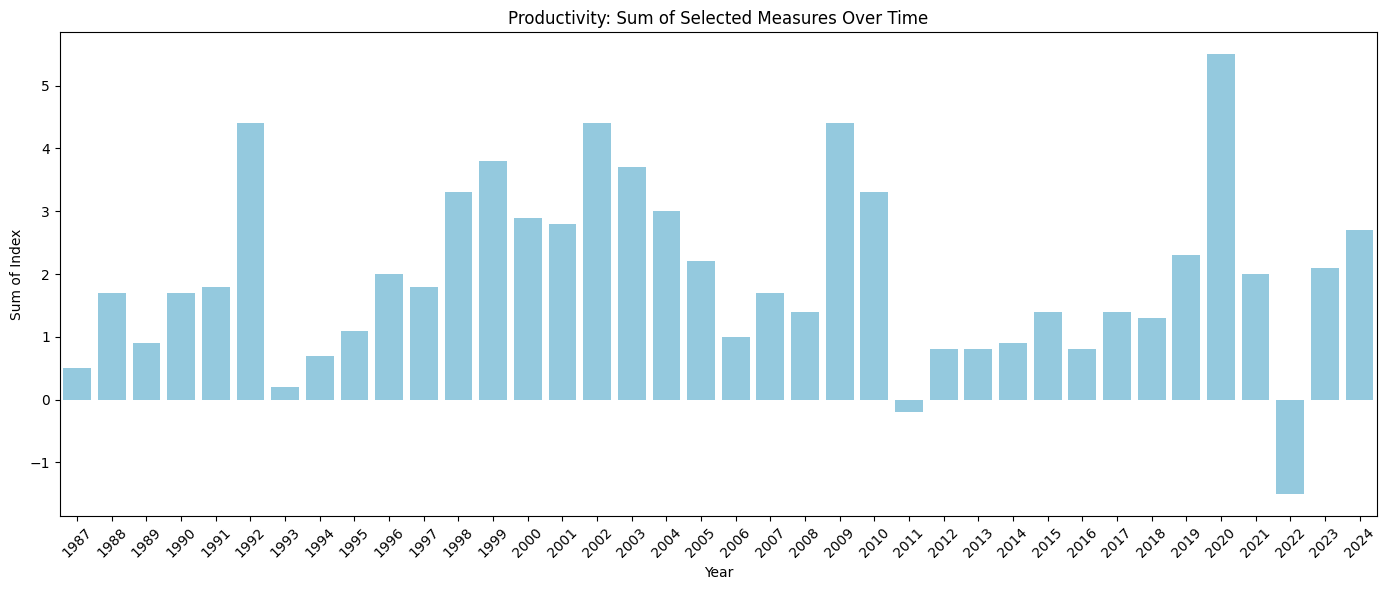

In [114]:
plt.figure(figsize=(14, 6))
sns.barplot(data=sum_df, x='Year', y='Value', color='skyblue')

plt.title('Productivity: Sum of Selected Measures Over Time')
plt.xlabel('Year')
plt.ylabel('Sum of Index')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
